In [29]:
import openeo
#https://github.com/eu-cdse/notebook-samples/blob/main/openeo/Load_Collection.ipynb

# Conectar con el backend de openEO
con = openeo.connect("openeo.dataspace.copernicus.eu")

# Autenticarse utilizando OpenID Connect (OIDC)
con.authenticate_oidc()

# Definición de la región y rango de tiempo de interés
spatial_extent = {"west": -6.21, "south": 42.29, "east": -6.18, "north": 42.32 ,"crs": "EPSG:4326",}
temporal_extent = ["2022-10-01", "2022-10-31"]

# Carga de la colección de datos Sentinel-2
datacube = con.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=spatial_extent,
    temporal_extent=temporal_extent,
    max_cloud_cover=10,
    bands=["B04", "B03", "B02", "SCL"],
)

datacube.download("dataset.nc")


Authenticated using refresh token.


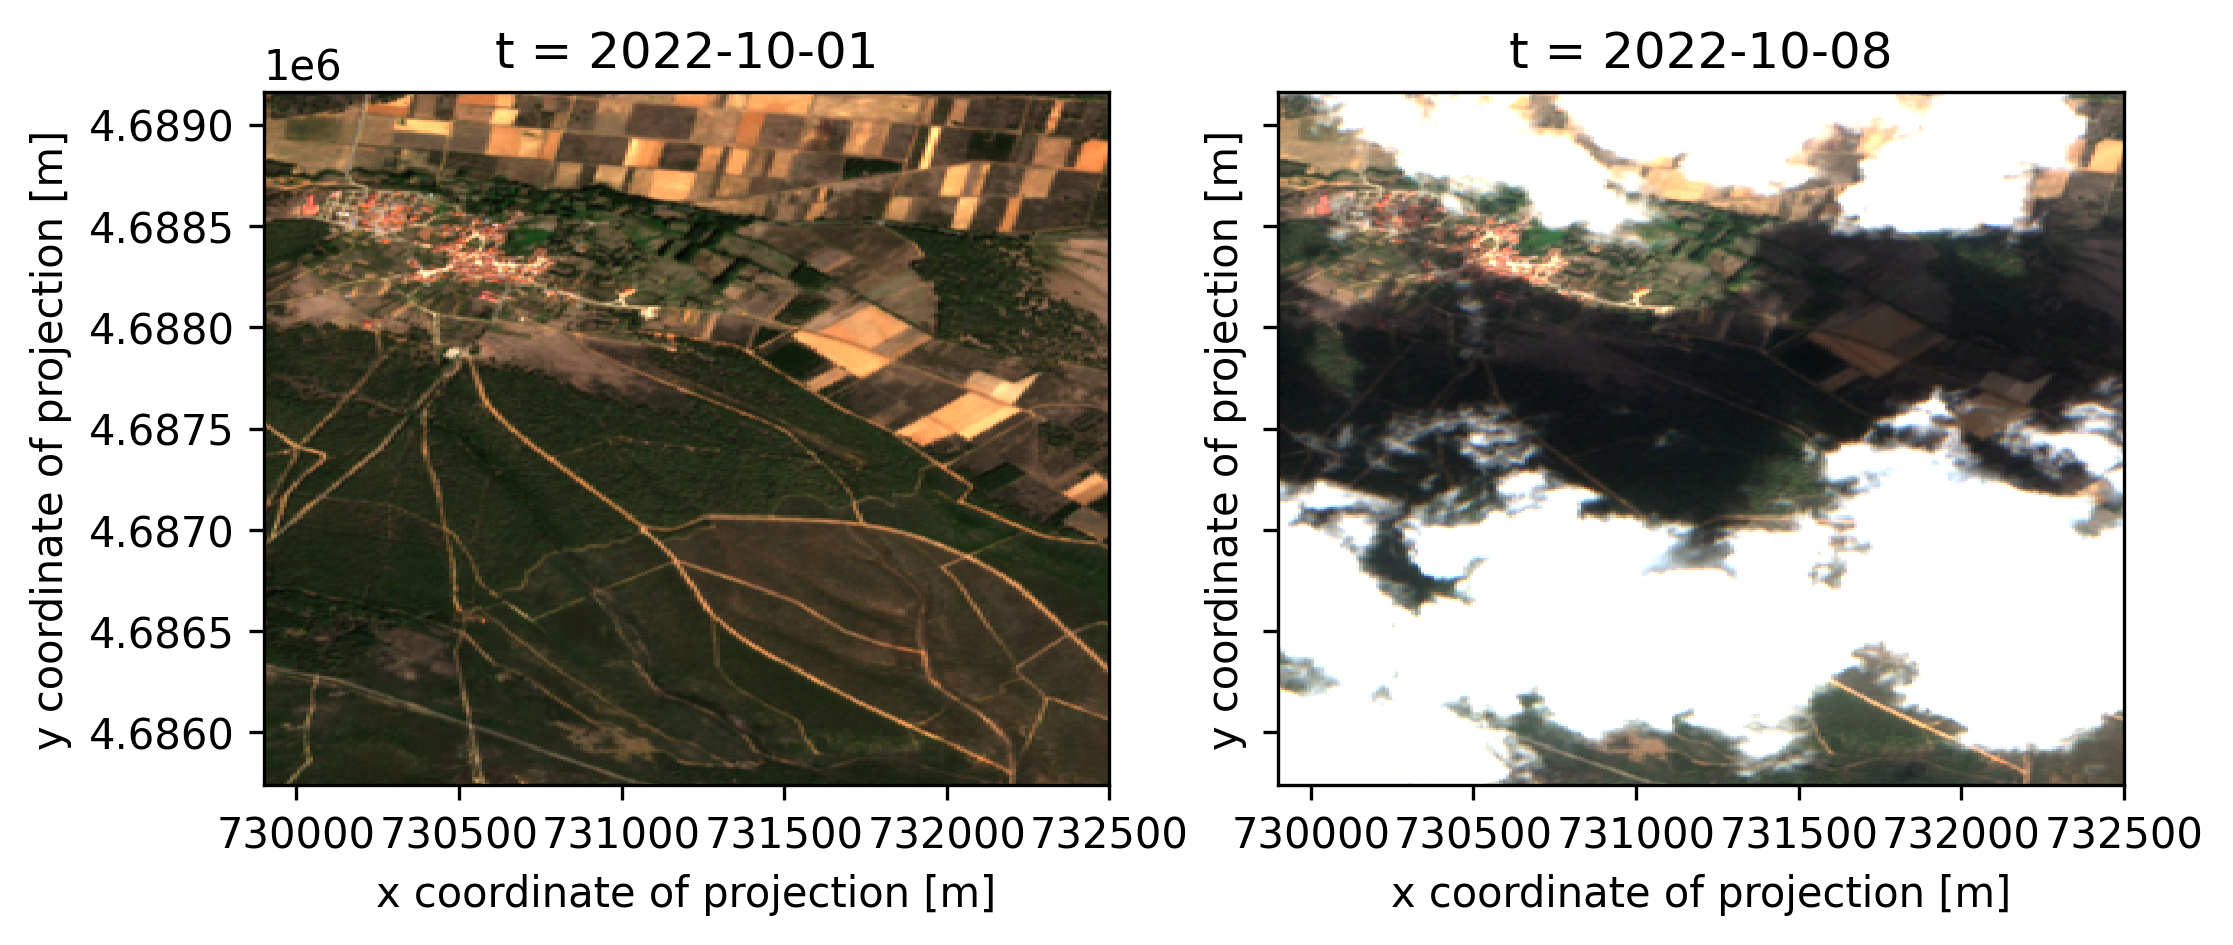

In [30]:
import xarray
import matplotlib.pyplot as plt

ds = xarray.load_dataset("dataset.nc")

# Convert xarray DataSet to a (bands, t, x, y) DataArray
data = ds[["B04", "B03", "B02"]].to_array(dim="bands")

fig, axes = plt.subplots(ncols=2, figsize=(8, 3), dpi=300, sharey=True)
data[{"t": 0}].plot.imshow(vmin=0, vmax=2000, ax=axes[0])
data[{"t": -1}].plot.imshow(vmin=0, vmax=2000, ax=axes[1]);



In [31]:
data

<xarray.DataArray (bands: 3, t: 2, y: 342, x: 260)> Size: 2MB
array([[[[  932.,   713.,   336., ...,   404.,   578.,   591.],
         [  734.,   880.,   387., ...,   437.,   496.,   405.],
         [  659.,   758.,   316., ...,   356.,   505.,   582.],
         ...,
         [  308.,   346.,   298., ...,   426.,   428.,   457.],
         [  302.,   281.,   278., ...,   467.,   430.,   389.],
         [  329.,   300.,   286., ...,   504.,   475.,   410.]],

        [[ 1402.,  1420.,  1184., ...,   696.,   794.,   905.],
         [ 1334.,  1316.,  1092., ...,   690.,   808.,   736.],
         [ 1122.,  1092.,   864., ...,   638.,   769.,   814.],
         ...,
         [ 8456.,  8744.,  8896., ...,   626.,   648.,   662.],
         [ 7904.,  8096.,  8304., ...,   672.,   607.,   618.],
         [ 7752.,  7696.,  7984., ...,   758.,   687.,   622.]]],


       [[[  686.,   608.,   357., ...,   350.,   418.,   487.],
         [  679.,   642.,   398., ...,   447.,   503.,   389.],
         [  562.,   495.,   269., ...,   370.,   440.,   514.],
...
         [ 8408.,  8672.,  8888., ...,   648.,   585.,   580.],
         [ 8000.,  8104.,  8336., ...,   654.,   614.,   596.]]],


       [[[  366.,   365.,   187., ...,   238.,   284.,   328.],
         [  371.,   436.,   216., ...,   288.,   310.,   251.],
         [  375.,   324.,   197., ...,   223.,   309.,   342.],
         ...,
         [  214.,   226.,   196., ...,   238.,   253.,   260.],
         [  178.,   188.,   171., ...,   258.,   235.,   224.],
         [  200.,   178.,   171., ...,   283.,   256.,   240.]],

        [[ 1130.,  1164.,  1064., ...,   546.,   610.,   674.],
         [ 1082.,  1148.,  1022., ...,   584.,   604.,   575.],
         [  932.,   919.,   848., ...,   516.,   585.,   642.],
         ...,
         [ 9816., 10080., 10168., ...,   495.,   487.,   490.],
         [ 9304.,  9544.,  9616., ...,   515.,   474.,   475.],
         [ 8688.,  8896.,  9048., ...,   518.,   501.,   490.]]]],
      dtype=float32)
Coordinates:
  * t        (t) datetime64[ns] 16B 2022-10-01 2022-10-08
  * x        (x) float64 2kB 7.299e+05 7.299e+05 ... 7.325e+05 7.325e+05
  * y        (y) float64 3kB 4.689e+06 4.689e+06 ... 4.686e+06 4.686e+06
  * bands    (bands) object 24B 'B04' 'B03' 'B02'
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

# Data processing

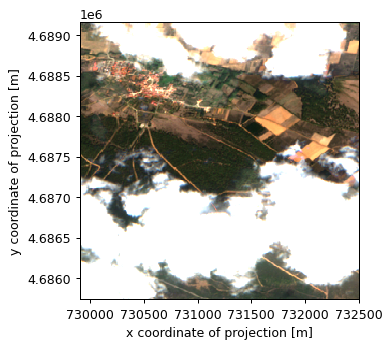

In [32]:
composite = datacube.max_time()
composite.download("load-composite.nc")

ds = xarray.load_dataset("load-composite.nc")
# Convert xarray DataSet to a (bands, x, y) DataArray
data = ds[["B04", "B03", "B02"]].to_array(dim="bands")

fig, ax = plt.subplots(ncols=1, figsize=(4, 4), dpi=90)
data.plot.imshow(vmin=0, vmax=2000, ax=ax)

In [33]:
data

<xarray.DataArray (bands: 3, y: 342, x: 260)> Size: 1MB
array([[[ 1402.,  1420.,  1184., ...,   696.,   794.,   905.],
        [ 1334.,  1316.,  1092., ...,   690.,   808.,   736.],
        [ 1122.,  1092.,   864., ...,   638.,   769.,   814.],
        ...,
        [ 8456.,  8744.,  8896., ...,   626.,   648.,   662.],
        [ 7904.,  8096.,  8304., ...,   672.,   607.,   618.],
        [ 7752.,  7696.,  7984., ...,   758.,   687.,   622.]],

       [[ 1324.,  1372.,  1186., ...,   784.,   763.,   786.],
        [ 1226.,  1250.,  1108., ...,   716.,   726.,   632.],
        [ 1060.,   963.,   858., ...,   640.,   722.,   754.],
        ...,
        [ 9040.,  9312.,  9552., ...,   623.,   616.,   636.],
        [ 8408.,  8672.,  8888., ...,   648.,   585.,   580.],
        [ 8000.,  8104.,  8336., ...,   654.,   614.,   596.]],

       [[ 1130.,  1164.,  1064., ...,   546.,   610.,   674.],
        [ 1082.,  1148.,  1022., ...,   584.,   604.,   575.],
        [  932.,   919.,   848., ...,   516.,   585.,   642.],
        ...,
        [ 9816., 10080., 10168., ...,   495.,   487.,   490.],
        [ 9304.,  9544.,  9616., ...,   515.,   474.,   475.],
        [ 8688.,  8896.,  9048., ...,   518.,   501.,   490.]]],
      dtype=float32)
Coordinates:
  * x        (x) float64 2kB 7.299e+05 7.299e+05 ... 7.325e+05 7.325e+05
  * y        (y) float64 3kB 4.689e+06 4.689e+06 ... 4.686e+06 4.686e+06
  * bands    (bands) object 24B 'B04' 'B03' 'B02'
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

In [34]:
scl_band = datacube.band("SCL")
cloud_mask = (scl_band == 3) | (scl_band == 8) | (scl_band == 9)

'\n# TODO: TEMP WORKAROUND FOR OFFSET ERROR ON SCL BAND\ncloud_mask = (scl_band == 3 - 1000) | (scl_band == 8 - 1000) | (scl_band == 9 - 1000)\n'

In [35]:
cloud_mask = cloud_mask.resample_cube_spatial(datacube)

In [36]:
cube_masked = datacube.mask(cloud_mask)
composite_masked = cube_masked.max_time()

composite_masked.download("load-composite-masked.nc")

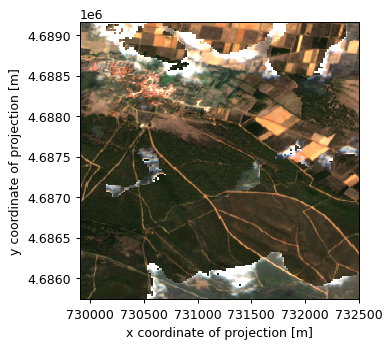

In [37]:
ds = xarray.load_dataset("load-composite-masked.nc")
# Convert xarray DataSet to a (bands, x, y) DataArray
data = ds[["B04", "B03", "B02"]].to_array(dim="bands")

fig, ax = plt.subplots(ncols=1, figsize=(4, 4), dpi=90)
data.plot.imshow(vmin=0, vmax=2000, ax=ax);

In [38]:
data

<xarray.DataArray (bands: 3, y: 342, x: 260)> Size: 1MB
array([[[1402., 1420., 1184., ...,  696.,  794.,  905.],
        [1334., 1316., 1092., ...,  690.,  808.,  736.],
        [1122., 1092.,  864., ...,  638.,  769.,  814.],
        ...,
        [ 308.,  346.,  298., ...,  626.,  648.,  662.],
        [ 302.,  281.,  278., ...,  672.,  607.,  618.],
        [ 329.,  300.,  286., ...,  758.,  687.,  622.]],

       [[1324., 1372., 1186., ...,  784.,  763.,  786.],
        [1226., 1250., 1108., ...,  716.,  726.,  632.],
        [1060.,  963.,  858., ...,  640.,  722.,  754.],
        ...,
        [ 347.,  352.,  350., ...,  623.,  616.,  636.],
        [ 318.,  316.,  301., ...,  648.,  585.,  580.],
        [ 319.,  293.,  304., ...,  654.,  614.,  596.]],

       [[1130., 1164., 1064., ...,  546.,  610.,  674.],
        [1082., 1148., 1022., ...,  584.,  604.,  575.],
        [ 932.,  919.,  848., ...,  516.,  585.,  642.],
        ...,
        [ 214.,  226.,  196., ...,  495.,  487.,  490.],
        [ 178.,  188.,  171., ...,  515.,  474.,  475.],
        [ 200.,  178.,  171., ...,  518.,  501.,  490.]]], dtype=float32)
Coordinates:
  * x        (x) float64 2kB 7.299e+05 7.299e+05 ... 7.325e+05 7.325e+05
  * y        (y) float64 3kB 4.689e+06 4.689e+06 ... 4.686e+06 4.686e+06
  * bands    (bands) object 24B 'B04' 'B03' 'B02'
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform